In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
from datetime import date, datetime
from scipy import stats
pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('data/bikes_ocasionales.csv', index_col = 0)
df.head(10)

,registro,clima,temperatura,sens_termica,humedad,viento,ocasionales,fecha_nueva,festividad,festividad_1,año_bueno,estacion_correcta,mes_bueno,dia_semana_nuevo,no_laboral_nuevo
0,1,2,14.1,18.2,81.0,10.7,331,2018-01-01,New Year's Day,1,2018,invierno,1,0,0
1,2,2,14.9,17.7,70.0,16.7,131,2018-01-02,NaN,0,2018,invierno,1,1,1
2,3,1,8.0,9.5,44.0,16.6,120,2018-01-03,NaN,0,2018,invierno,1,2,1
3,4,1,8.2,10.6,59.0,10.7,108,2018-01-04,NaN,0,2018,invierno,1,3,1
4,5,1,9.3,11.5,44.0,12.5,82,2018-01-05,NaN,0,2018,invierno,1,4,1
5,6,1,8.4,11.7,52.0,6.0,88,2018-01-06,NaN,0,2018,invierno,1,5,0
6,7,2,8.1,10.4,50.0,11.3,148,2018-01-07,NaN,0,2018,invierno,1,6,0
7,8,2,6.8,8.1,54.0,17.9,68,2018-01-08,NaN,0,2018,invierno,1,0,1
8,9,1,5.7,5.8,43.0,24.3,54,2018-01-09,NaN,0,2018,invierno,1,1,1
9,10,1,6.2,7.5,48.0,15.0,41,2018-01-10,NaN,0,2018,invierno,1,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   registro           730 non-null    int64  
 1   clima              730 non-null    int64  
 2   temperatura        730 non-null    float64
 3   sens_termica       730 non-null    float64
 4   humedad            730 non-null    float64
 5   viento             730 non-null    float64
 6   ocasionales        730 non-null    int64  
 7   fecha_nueva        730 non-null    object 
 8   festividad         21 non-null     object 
 9   festividad_1       730 non-null    int64  
 10  año_bueno          730 non-null    int64  
 11  estacion_correcta  730 non-null    object 
 12  mes_bueno          730 non-null    int64  
 13  dia_semana_nuevo   730 non-null    int64  
 14  no_laboral_nuevo   730 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 91.2+ KB


In [4]:
#Volvemos a cambiar la columna de fecha a datetime, porque al importar el csv no se ha guardado con ese tipo.
df['fecha_nueva'] = pd.to_datetime(df["fecha_nueva"], format="%Y-%m-%d")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   registro           730 non-null    int64         
 1   clima              730 non-null    int64         
 2   temperatura        730 non-null    float64       
 3   sens_termica       730 non-null    float64       
 4   humedad            730 non-null    float64       
 5   viento             730 non-null    float64       
 6   ocasionales        730 non-null    int64         
 7   fecha_nueva        730 non-null    datetime64[ns]
 8   festividad         21 non-null     object        
 9   festividad_1       730 non-null    int64         
 10  año_bueno          730 non-null    int64         
 11  estacion_correcta  730 non-null    object        
 12  mes_bueno          730 non-null    int64         
 13  dia_semana_nuevo   730 non-null    int64         
 14  no_laboral

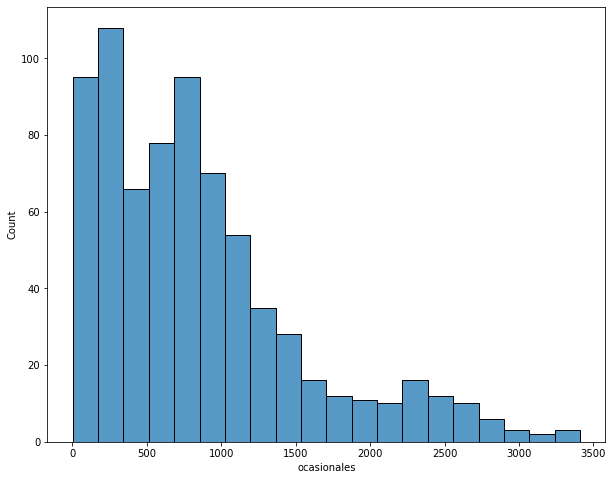

In [6]:
sns.histplot(data = df, x = "ocasionales");

NO tiene distribucion normal

/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_18993/2740126696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_18993/2740126696.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/lb/nyps7wf17_767t6ln21znwmh0000gn/T/ipykernel_18993/2740126696.py:3: FutureWarning: The default value of numeric_only in Da

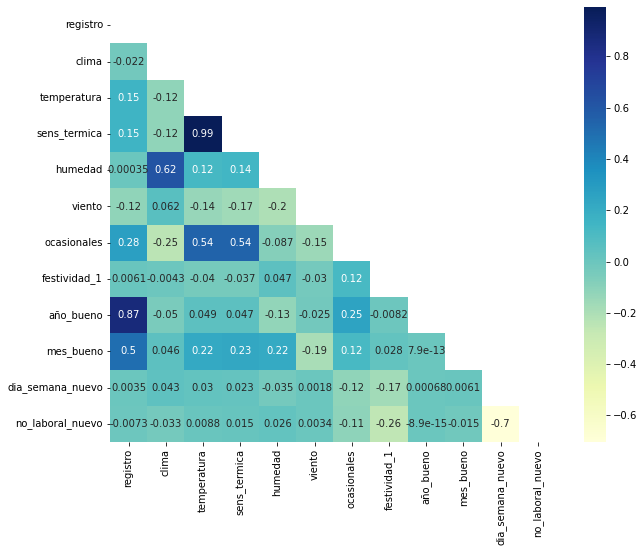

In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

Vemos que donde mas correlacion hay es entre sensacion termica y temperatura. Y entre año_bueno y registro

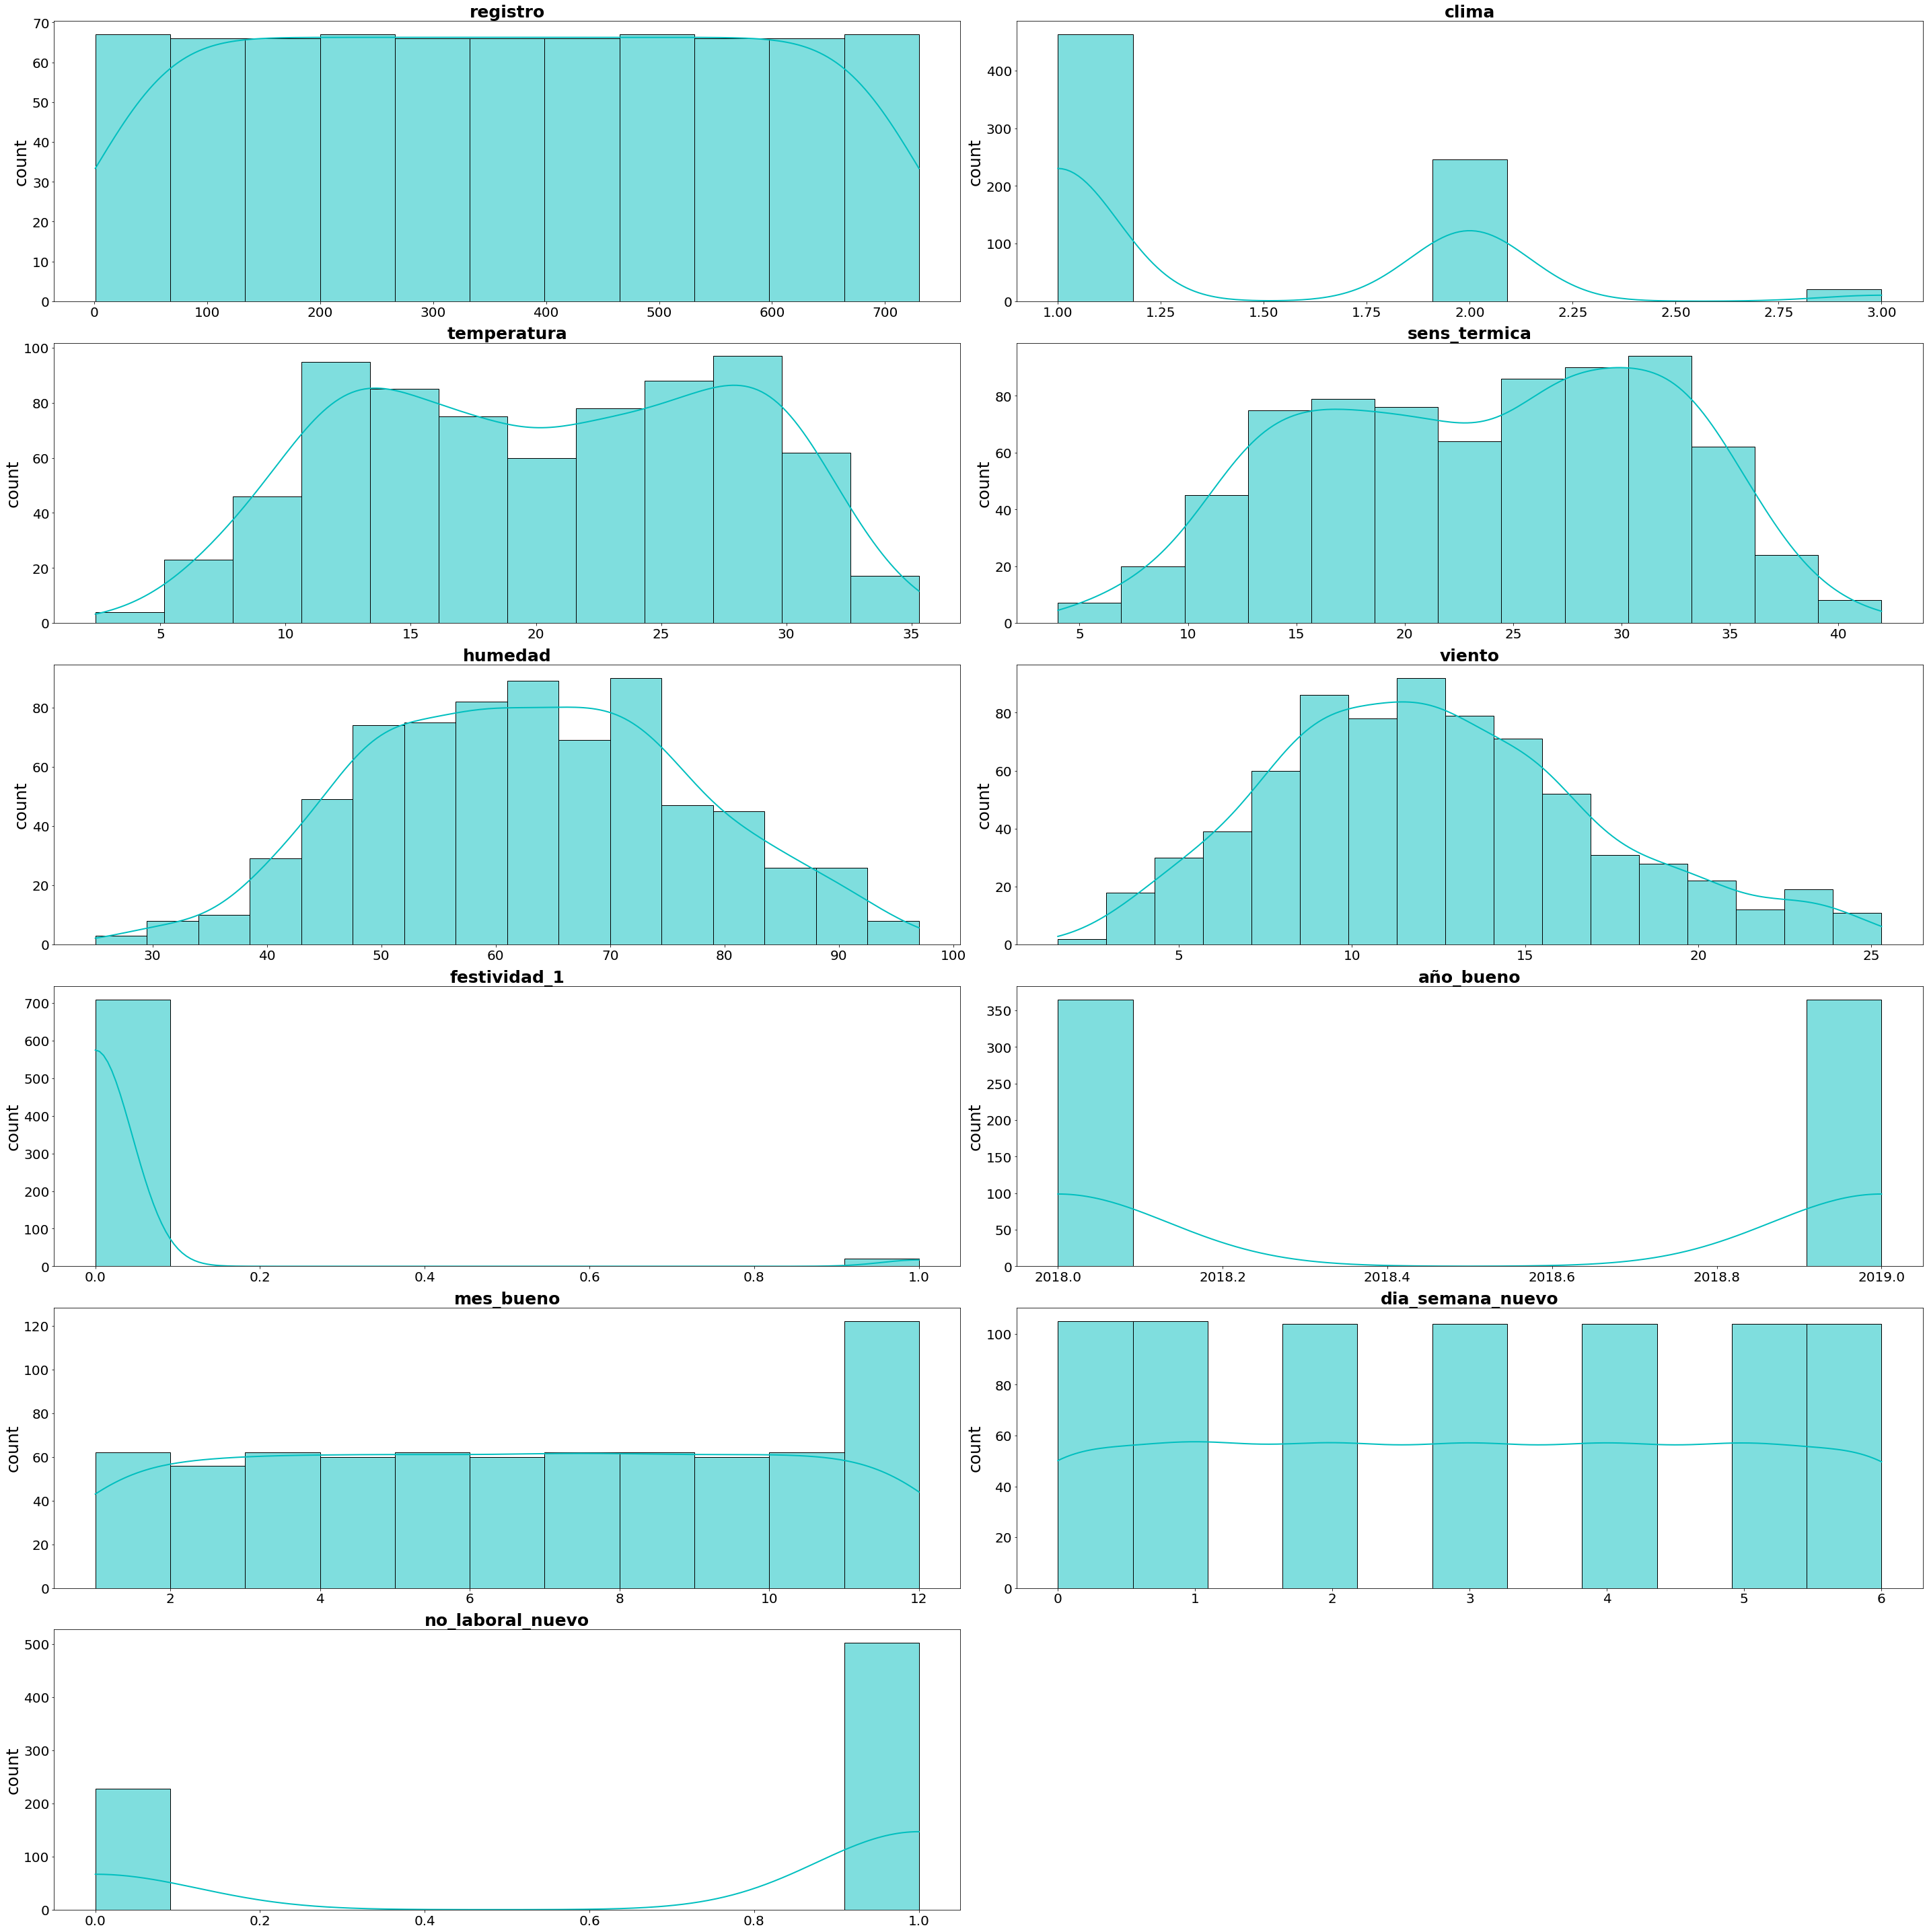

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (40, 40))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("ocasionales")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "c", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count", fontsize = 25)


fig.tight_layout()
fig.delaxes(axes[-1]);

''

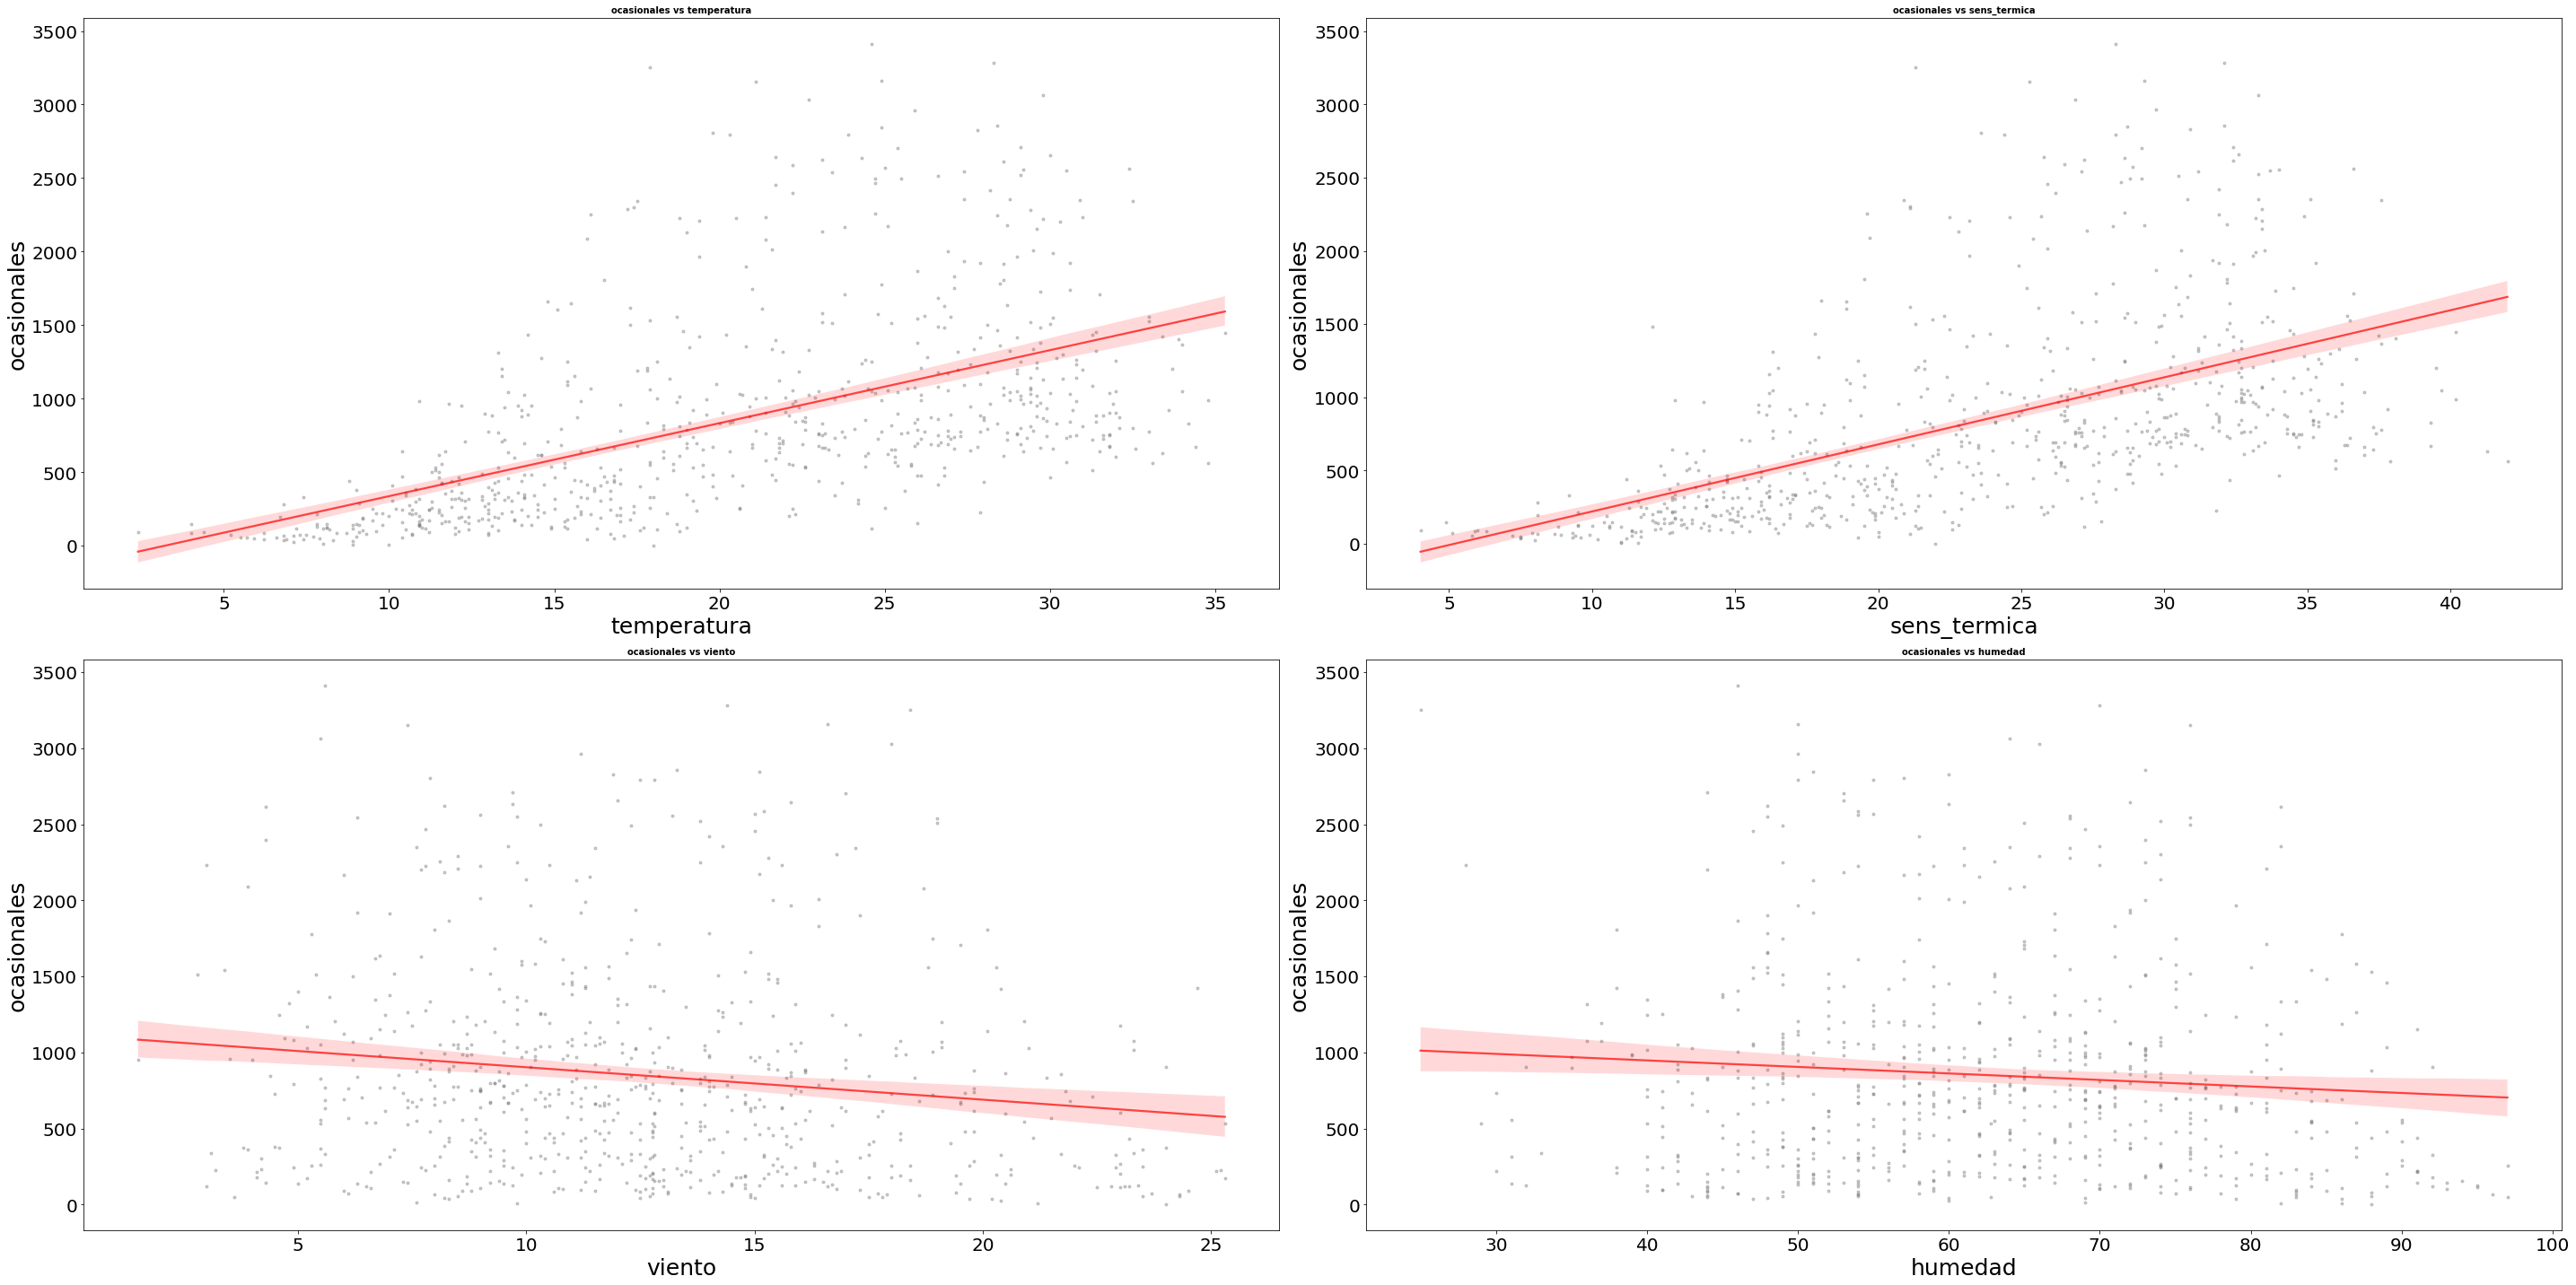

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("ocasionales")
lista_numericas=['temperatura','sens_termica','viento', 'humedad']

for i, colum in enumerate(lista_numericas):
    sns.regplot(
        x = df[colum], 
        y = df["ocasionales"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"ocasionales vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum, fontsize = 25)
    axes[i].set_ylabel( "ocasionales", fontsize = 25)
    
fig.tight_layout()
#fig.delaxes(axes[-1])
;

## Asunciones

In [11]:
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

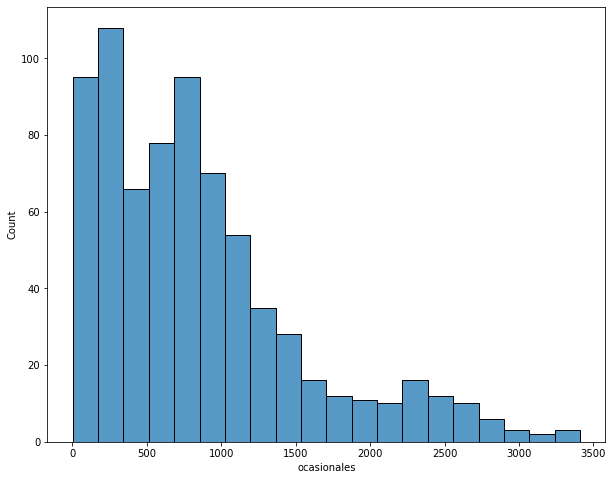

In [12]:
sns.histplot(data = df, x = "ocasionales");

In [13]:
stats.shapiro(df["ocasionales"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

NO cumple normalidad asi que no seguimos con las asunciones

Intentamos normalizar ocasionales

In [14]:
df['ocasionales_BOX'], lambda_ajustada = stats.boxcox(df['ocasionales'])


In [15]:
lambda_ajustada

0.31221364474658037

/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ana/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


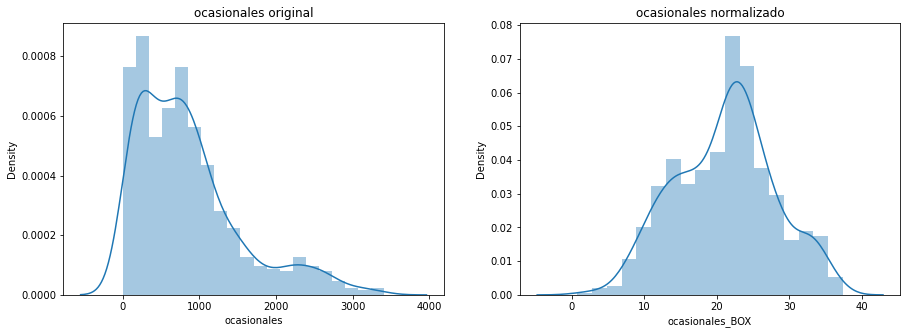

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('ocasionales original')
axes[1].set_title('ocasionales normalizado')

sns.distplot(df['ocasionales'] ,ax = axes[0])
sns.distplot(df['ocasionales_BOX'], ax = axes[1]);

In [17]:
stats.shapiro(df["ocasionales_BOX"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

Hemos conseguido normalizar un poco los datos pero aun asi NO son normales

In [18]:
df.head()

,registro,clima,temperatura,sens_termica,humedad,viento,ocasionales,fecha_nueva,festividad,festividad_1,año_bueno,estacion_correcta,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,ocasionales_BOX
0,1,2,14.1,18.2,81.0,10.7,331,2018-01-01,New Year's Day,1,2018,invierno,1,0,0,16.397820
1,2,2,14.9,17.7,70.0,16.7,131,2018-01-02,NaN,0,2018,invierno,1,1,1,11.472437
2,3,1,8.0,9.5,44.0,16.6,120,2018-01-03,NaN,0,2018,invierno,1,2,1,11.076035
3,4,1,8.2,10.6,59.0,10.7,108,2018-01-04,NaN,0,2018,invierno,1,3,1,10.613970
4,5,1,9.3,11.5,44.0,12.5,82,2018-01-05,NaN,0,2018,invierno,1,4,1,9.475537


In [21]:
df.to_csv("data/ocasionales2.csv")